## Problem Statement

Build a multivariate gaussian classifier, with 784 dimensions, that classifies hand written digits from the MNIST data set.  Data can be optained from http://yann.lecun.com/exdb/mnist/index.html.

### Load functions and modules

In [2]:
from numpy.linalg import inv
from scipy.stats import multivariate_normal 
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 
from numpy import log
from numpy import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

### Load Data

In [3]:
%cd ~/Documents/DSE/c1steven/DSE210/MNIST
x,y = loadmnist('train-images-idx3-ubyte','train-labels-idx1-ubyte')
xtest,ytest = loadmnist('t10k-images-idx3-ubyte','t10k-labels-idx1-ubyte')

/Users/cjstev/Documents/DSE/c1steven/DSE210/MNIST


### Create Training and Validation Sets

In [4]:
import random
random.seed(50)
mask = random.sample(range(0, len(x)), 50000)
invmask = list(set(np.arange(60000))-set(mask))
xtrain = x[mask]
xvalid = x[invmask]
ytrain = y[mask]
yvalid = y[invmask]

### Create Class Probabilities (Pi)

In [5]:
class_dict = {}
for i in np.unique(ytrain):
    class_dict[i]= sum(ytrain==i)*1.0/len(ytrain)

### Create Mean Vector of Multi-variate Guassian 

In [6]:
xtrain_mu = {}
for i in np.unique(ytrain):
    xtrain_mu[i]=np.mean(xtrain[ytrain==i],axis=0)

### Create Covariate Matrix of Multi-variate Guassian 

In [7]:
xtrain_cov = {}
for i in np.unique(ytrain):
    xtrain_cov[i]=np.cov(xtrain[ytrain==i].transpose())

### Create Function to test different smoothing coefficients - c

In [8]:
##improved
def myfitter(xvalid,c):
    myeye = np.eye(784)*c
    myarray = np.empty(shape=[len(xvalid),0])

    for i in range(10):
        fit_test = log(class_dict[i])+multivariate_normal.logpdf(xvalid,mean=xtrain_mu[i],
                                                            cov = (xtrain_cov[i]+myeye))

        myarray=np.append(myarray,fit_test)
    #predlist.append(mylist.index(max(mylist)))
    myarray = np.reshape(myarray,(10,len(xvalid)))
    predlist = np.argmax(myarray,axis=0)
    return sum(predlist==yvalid)*1.0/len(yvalid)

### Create different c values and pass them through the above function

In [9]:
steps = np.arange(100,10001,100)
acc = [myfitter(xvalid,k) for k in steps]

### Plot Results

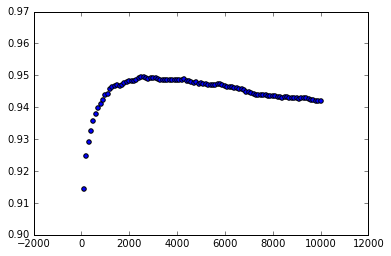

In [10]:
plt.scatter(steps,acc)

The results show that the accuracy of the prediction improves until about a C = 2000, then slowly erodes as C gets large.

### Find C value that yields maximum accuracy

In [11]:
steps[acc.index(max(acc))]

2500

### Refit entire training set and predict the test set with c = 3400

In [12]:
class_dict = {}
for i in np.unique(y):
    class_dict[i]= sum(y==i)*1.0/len(y)

In [13]:
x_mu = {}
for i in np.unique(y):
    x_mu[i]=np.mean(x[y==i],axis=0)

In [14]:
x_cov = {}
for i in np.unique(y):
    x_cov[i]=np.cov(x[y==i].transpose())

In [15]:
myarray = np.empty(shape=[10000,0])
c=steps[acc.index(max(acc))]
myeye = np.eye(784)*c
for i in range(10):
    fit_test = log(class_dict[i])+multivariate_normal.logpdf(xtest,mean=x_mu[i],
                                                        cov = (x_cov[i]+myeye))

    myarray=np.append(myarray,fit_test)

myarray = np.reshape(myarray,(10,10000))
predlist = np.argmax(myarray,axis=0)
sum(predlist==ytest)*1.0/len(ytest),1-sum(predlist==ytest)*1.0/len(ytest)

(0.95660000000000001, 0.043399999999999994)

95.66% accuracy and 4.34% error rate!

### Refit entire training set and predict the test set with optimal C value

In [16]:
todisplay = xtest[predlist!=ytest ]

In [17]:
mymask=np.random.randint(len(todisplay),size=5)

In [18]:
todisplay = todisplay[mymask,:]

Examples of misclassification and appropriate posterior probabilities:


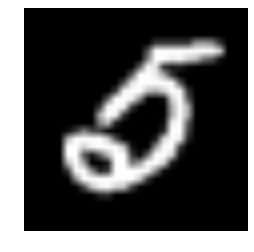

Prob of 0 is 9.73%
Prob of 1 is 10.63%
Prob of 2 is 9.86%
Prob of 3 is 9.86%
Prob of 4 is 9.96%
Prob of 5 is 9.76%
Prob of 6 is 9.86%
Prob of 7 is 10.28%
Prob of 8 is 9.96%
Prob of 9 is 10.10%


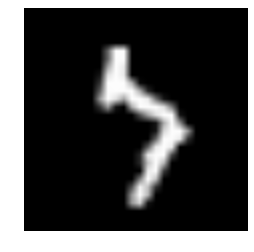

Prob of 0 is 10.04%
Prob of 1 is 10.15%
Prob of 2 is 10.08%
Prob of 3 is 9.95%
Prob of 4 is 9.96%
Prob of 5 is 9.91%
Prob of 6 is 10.04%
Prob of 7 is 9.95%
Prob of 8 is 9.96%
Prob of 9 is 9.96%


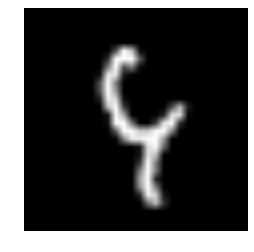

Prob of 0 is 10.13%
Prob of 1 is 10.10%
Prob of 2 is 10.05%
Prob of 3 is 10.02%
Prob of 4 is 9.87%
Prob of 5 is 10.00%
Prob of 6 is 10.01%
Prob of 7 is 10.01%
Prob of 8 is 9.92%
Prob of 9 is 9.90%


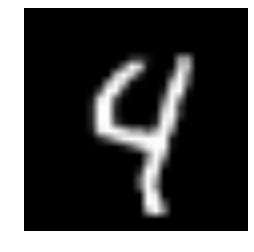

Prob of 0 is 10.15%
Prob of 1 is 10.22%
Prob of 2 is 10.08%
Prob of 3 is 10.00%
Prob of 4 is 9.78%
Prob of 5 is 10.06%
Prob of 6 is 10.15%
Prob of 7 is 9.86%
Prob of 8 is 9.94%
Prob of 9 is 9.76%


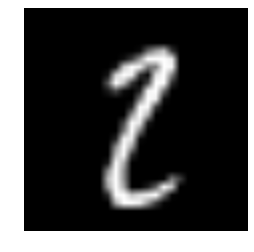

Prob of 0 is 10.02%
Prob of 1 is 9.83%
Prob of 2 is 9.98%
Prob of 3 is 9.99%
Prob of 4 is 10.06%
Prob of 5 is 10.03%
Prob of 6 is 10.15%
Prob of 7 is 10.03%
Prob of 8 is 9.87%
Prob of 9 is 10.04%


In [19]:
print "Examples of misclassification and appropriate posterior probabilities:"
for i in todisplay:
    myProbList=[]
    displaychar(i)
    for k in range(10):
        myprob = log(class_dict[k])+multivariate_normal.logpdf(i,mean=x_mu[k],
                                                        cov = (x_cov[k]+myeye))
        myProbList.append(myprob)
    for k in range(10):
        myPostProb = myProbList[k]/sum(myProbList)
        
        print "Prob of {0} is {1:.2f}%".format(k,myPostProb*100)